In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from keras.datasets import cifar10
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

Using TensorFlow backend.


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

# Displaying an image

[8]


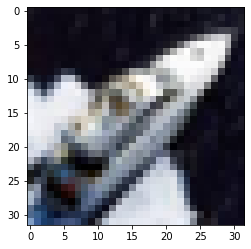

In [5]:
i=20000
plt.imshow(X_train[i])
print(y_train[i])

# Displaying multiple images in a grid

C:\Anaconda\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


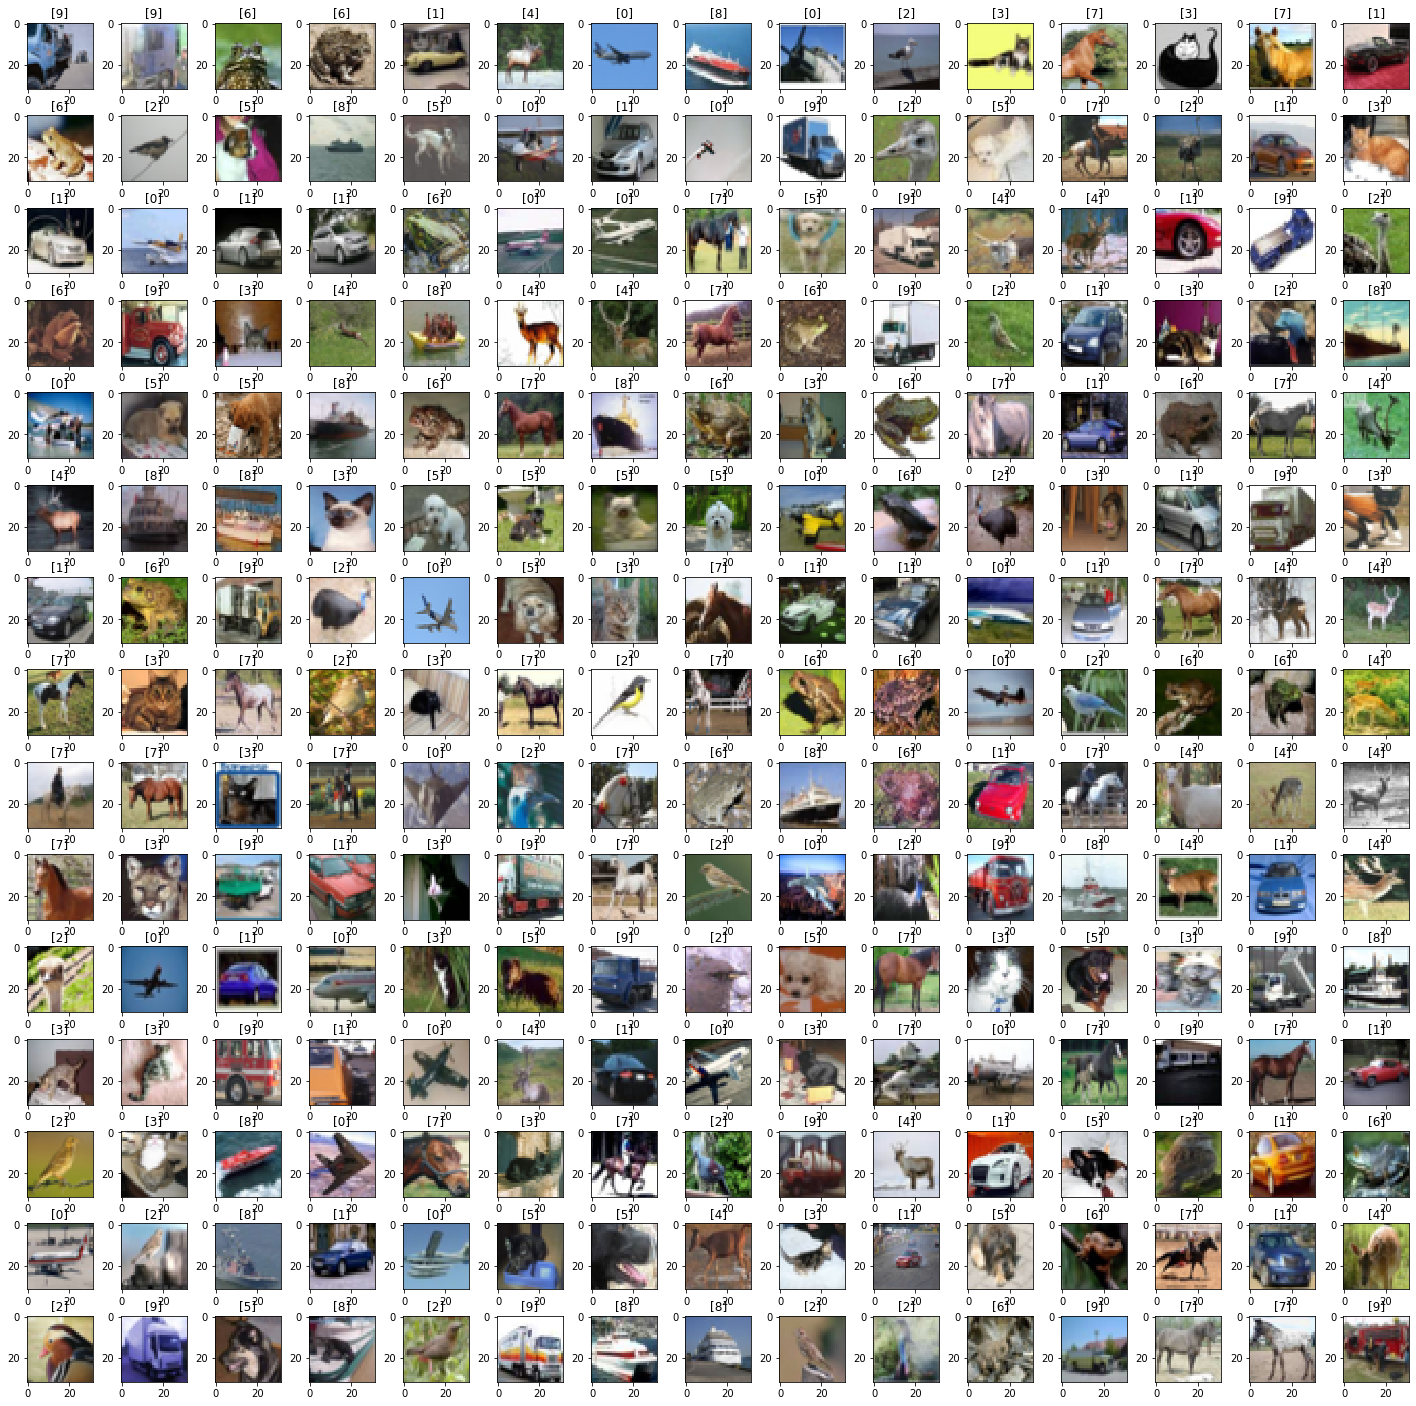

In [6]:
# Creating 15 X 15 Grid
W_grid = 15
L_grid = 15
fig, axes = plt.subplots(L_grid,W_grid, figsize = (25,25))
axes = axes.ravel()
n_training = len(X_train)

# Adding images to the grid
for i in np.arange(0, L_grid * W_grid) :
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])

plt.subplots_adjust(hspace=0.4)

# Data Preparation

In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

num_cat = 10

In [8]:
# Convert y from decimal to binary

import keras
y_train = keras.utils.to_categorical(y_train,num_cat)
y_test = keras.utils.to_categorical(y_test,num_cat)

In [9]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [10]:
# Normalization

X_train = X_train/255
X_test = X_test/255

Input_shape = X_train.shape[1:]
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

# Model Training

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [12]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 1024, activation='relu'))
cnn_model.add(Dense(units = 1024, activation='relu'))

cnn_model.add(Dense(units = 10,activation='softmax'))

In [13]:
cnn_model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.rmsprop(lr=0.001), metrics = ['accuracy'])
history = cnn_model.fit(X_train,y_train,batch_size=32, epochs=2, shuffle=True)

Epoch 1/2
50000/50000 [==============================] - 248s 5ms/step - loss: 1.6294 - accuracy: 0.4130
Epoch 2/2
50000/50000 [==============================] - 235s 5ms/step - loss: 1.2339 - accuracy: 0.5754


# Model Evaluation

In [14]:
evaluation = cnn_model.evaluate(X_test,y_test)
print('Test Accuracy : {}'.format(evaluation[1]))

10000/10000 [==============================] - 11s 1ms/step
Test Accuracy : 0.5867000222206116


In [15]:
predicted_classes = cnn_model.predict_classes(X_test)

In [16]:
# Converting binary labels back to decimal
y_test = y_test.argmax(1) 

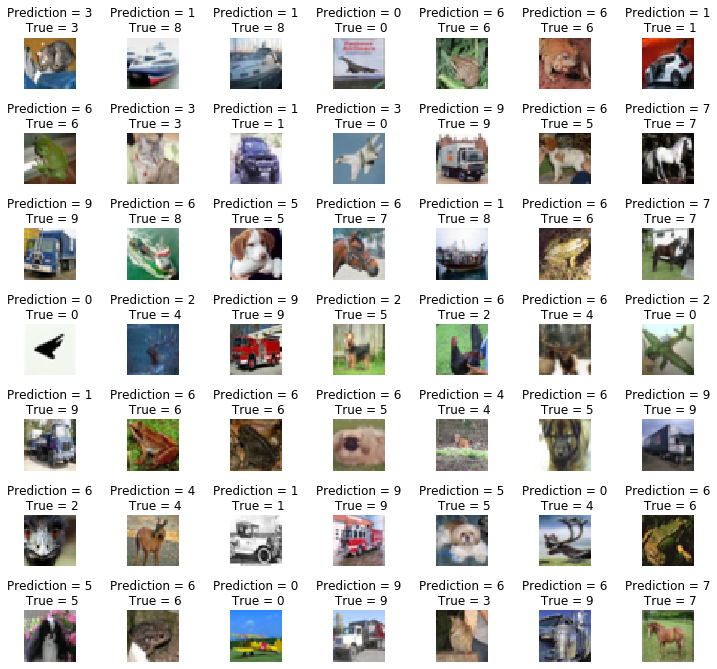

In [17]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

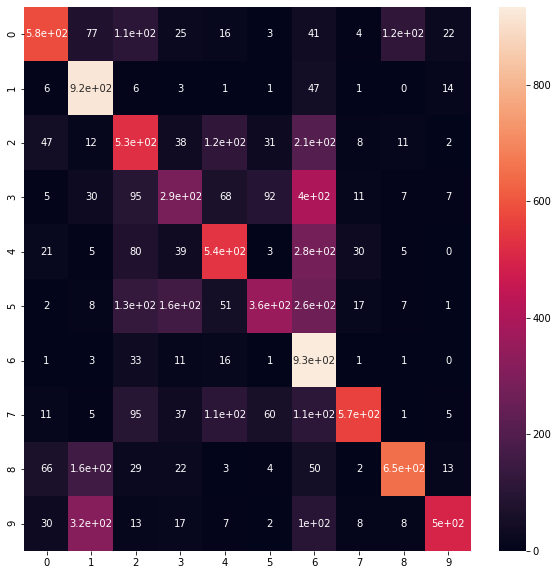

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

# Save The model

In [20]:
import os
directory = os.path.join(os.getcwd(),'saved-model')

if not os.path.isdir(directory) :
    os.makedirs(directory)
    
model_path = os.path.join(directory,'cifar10.h5')
cnn_model.save(model_path)

# Model Training using Augmented Dataset

In [31]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=90, width_shift_range=0.1, horizontal_flip=True, vertical_flip=True)
datagen.fit(X_train)
cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size=32), epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 237s 152ms/step - loss: 1.5696 - accuracy: 0.4417
Epoch 2/50
1563/1563 [==============================] - 252s 161ms/step - loss: 1.5471 - accuracy: 0.4503
Epoch 3/50
1563/1563 [==============================] - 252s 162ms/step - loss: 1.5197 - accuracy: 0.4601
Epoch 4/50
1563/1563 [==============================] - 253s 162ms/step - loss: 1.5158 - accuracy: 0.4654
Epoch 5/50
1563/1563 [==============================] - 259s 166ms/step - loss: 1.5162 - accuracy: 0.4678
Epoch 6/50
1563/1563 [==============================] - 251s 160ms/step - loss: 1.5183 - accuracy: 0.4682
Epoch 7/50
1563/1563 [==============================] - 250s 160ms/step - loss: 1.5102 - accuracy: 0.4724
Epoch 8/50
1563/1563 [==============================] - 252s 161ms/step - loss: 1.4974 - accuracy: 0.4744
Epoch 9/50
1563/1563 [==============================] - 268s 172ms/step - loss: 1.5053 - accuracy: 0.4745
Epoch 10/50
1563/1563 [=======================

KeyboardInterrupt: 